In [30]:
#path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'
path = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/'

In [31]:
import glob

In [32]:
#files = glob.glob('%s/out_20171130_17*_node_*transformed_MVA/cat_opt.json' % path)
#files = glob.glob('%s/out_20180601_162230_node_*_transformed_MVA/cat_opt.json' % path)
#files = glob.glob('%s/out_20180601_164515_node_*_transformed_MVA/cat_opt.json' % path)
#date='20180628_143644'
date='20180628_154339'
#files = glob.glob('%s/out_%s_node_*_transformed_MVA/cat_opt.json' % (path,date))
files = glob.glob('%s/out_%s_node_*_transformed_MVA_step2/cat_opt.json' % (path,date))



In [33]:
files

['/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_10_transformed_MVA_step2/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_11_transformed_MVA_step2/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_12_transformed_MVA_step2/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_13_transformed_MVA_step2/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_14_transformed_MVA_step2/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_2_transformed_MVA_step2/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_154339_node_3_tra

In [34]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom', 'nbins'] } #,'selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']} #,'selections']  }


for fil in files:
    dirnam = fil.split('/')[-2]
    name = dirnam.split('node_')[-1]
    dirSuf = name.replace(name.split('_')[0]+'_','')
#    nbins = int(dirnam.split('_')[-3].split('x')[0])
    if name == str('SM_'+dirSuf): name = '0'
    node = int(name.replace('_'+dirSuf,''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
#        val['nbins'] = nbins
        val['boundaries'] = np.array(val['boundaries'])
        #val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

#print(summary)
    

In [35]:
import pandas as pd
df = pd.DataFrame(summary)

In [36]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [37]:
df.sort_index(inplace=True)
df

boundaries      fom  ncat  node
ncat node                                                  
3    0     [1.01, 0.777, 0.514, 0.274]   -2.408     3     0
     2      [1.01, 0.764, 0.425, 0.11]   -3.910     3     2
     3     [1.01, 0.799, 0.513, 0.292]   -4.809     3     3
     4     [1.01, 0.773, 0.509, 0.326]   -3.859     3     4
     5        [1.01, 0.636, 0.4, 0.11]   -2.816     3     5
     6     [1.01, 0.788, 0.507, 0.313]   -4.232     3     6
     7     [1.01, 0.803, 0.521, 0.297]   -4.295     3     7
     8      [1.01, 0.781, 0.56, 0.317]   -2.480     3     8
     9     [1.01, 0.805, 0.546, 0.318]   -2.942     3     9
     10     [1.01, 0.778, 0.385, 0.11]   -3.209     3    10
     11    [1.01, 0.796, 0.451, 0.264]   -4.493     3    11
     12      [1.01, 0.83, 0.521, 0.11]  478.309     3    12
     13     [1.01, 0.841, 0.556, 0.11]  478.035     3    13
     14     [1.01, 0.798, 0.53, 0.285]   -3.564     3    14

In [38]:
df = df.query('fom<0')

In [39]:
df

boundaries    fom  ncat  node
ncat node                                                
3    0     [1.01, 0.777, 0.514, 0.274] -2.408     3     0
     2      [1.01, 0.764, 0.425, 0.11] -3.910     3     2
     3     [1.01, 0.799, 0.513, 0.292] -4.809     3     3
     4     [1.01, 0.773, 0.509, 0.326] -3.859     3     4
     5        [1.01, 0.636, 0.4, 0.11] -2.816     3     5
     6     [1.01, 0.788, 0.507, 0.313] -4.232     3     6
     7     [1.01, 0.803, 0.521, 0.297] -4.295     3     7
     8      [1.01, 0.781, 0.56, 0.317] -2.480     3     8
     9     [1.01, 0.805, 0.546, 0.318] -2.942     3     9
     10     [1.01, 0.778, 0.385, 0.11] -3.209     3    10
     11    [1.01, 0.796, 0.451, 0.264] -4.493     3    11
     14     [1.01, 0.798, 0.53, 0.285] -3.564     3    14

In [46]:
boundaries = np.vstack(df.loc[[3,3]]['boundaries']) 
print boundaries
boundaries[:,0] = 1.001
boundaries_shape = boundaries.shape
print boundaries_shape
boundaries=np.array(boundaries[boundaries[:,3] > 0.11]).reshape(-1,4)
print boundaries

[[ 1.01   0.777  0.514  0.274]
 [ 1.01   0.764  0.425  0.11 ]
 [ 1.01   0.799  0.513  0.292]
 [ 1.01   0.773  0.509  0.326]
 [ 1.01   0.636  0.4    0.11 ]
 [ 1.01   0.788  0.507  0.313]
 [ 1.01   0.803  0.521  0.297]
 [ 1.01   0.781  0.56   0.317]
 [ 1.01   0.805  0.546  0.318]
 [ 1.01   0.778  0.385  0.11 ]
 [ 1.01   0.796  0.451  0.264]
 [ 1.01   0.798  0.53   0.285]]
(12, 4)
[[ 1.001  0.777  0.514  0.274]
 [ 1.001  0.799  0.513  0.292]
 [ 1.001  0.773  0.509  0.326]
 [ 1.001  0.788  0.507  0.313]
 [ 1.001  0.803  0.521  0.297]
 [ 1.001  0.781  0.56   0.317]
 [ 1.001  0.805  0.546  0.318]
 [ 1.001  0.796  0.451  0.264]
 [ 1.001  0.798  0.53   0.285]]


In [47]:
boundaries_sort=[]
for i in range(boundaries.shape[0]):
    if (sorted(boundaries[i],reverse=True)==boundaries[i]).all():
        boundaries_sort.append(boundaries[i])

In [48]:
boundaries = np.array(boundaries_sort)
means = boundaries.mean(axis=0)
means

array([ 1.001     ,  0.79111111,  0.51677778,  0.29844444])

In [49]:
#boundaries.std(axis=0)

In [50]:
import os
tag='newcodev2'
pathsave = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/plots/%s_%s/'%(date,tag)
if not os.path.exists(pathsave):
    print pathsave, "doesn't exist, creating it..."
    os.makedirs(pathsave)

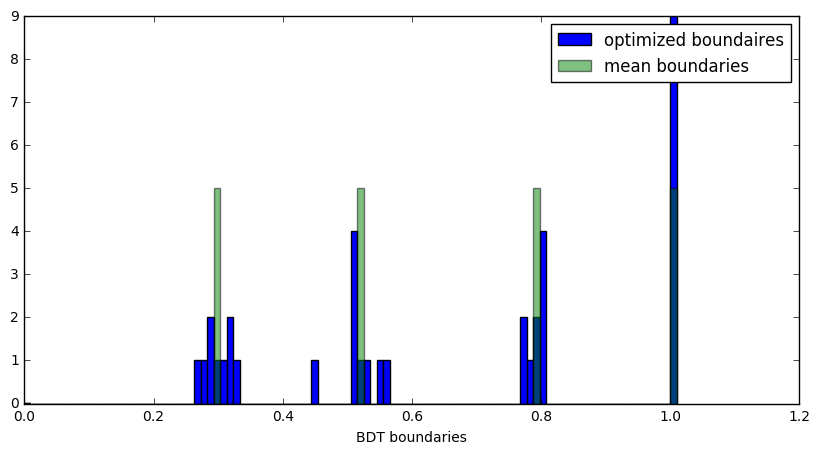

In [51]:
import matplotlib.pyplot as plt

plt.clf()
# means[0] = 1.001
plt.figure(figsize=(10,5))
plt.hist(boundaries.ravel(),bins=100,range=[0.,1.01],label="optimized boundaires");
plt.hist(means,bins=100,range=[0.,1.01],weights=5.*np.ones_like(means),alpha=0.5,label="mean boundaries");
plt.xlabel("BDT boundaries")
plt.legend()
plt.savefig(pathsave+"clusteringMVAstep2_%s_%s"%(tag,date)+".pdf")
plt.show()

In [52]:
print means
info_file = open(pathsave+"info_clusteringMVAstep2_%s_%s.txt"%(tag,date),"w") 
info_file.write(",\n".join([str(i) for i in means]))
info_file.close()

[ 1.001       0.79111111  0.51677778  0.29844444]
